In [1]:
#import necessary libraries for classification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

In [2]:
train= pd.read_csv('train_clean.csv')
test = pd.read_csv('data/test.csv')


In [3]:
train.head()

,name,explicit,popularity,artists,album_name,danceability,energy,key,loudness,mode,...,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,genre,duration_s
0,Long Road,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,True,...,0.53600,0.281,0.6350,142.221,241760,4,567.0,141.0,j-dance,241.760
1,"Daniâl My Son, Where Did You Vanish?",False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,False,...,0.93400,0.360,0.0336,75.596,444000,4,617.0,155.0,iranian,444.000
2,Ondskapens Galakse,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,True,...,0.80000,0.262,0.4890,116.628,333507,4,652.0,162.0,black-metal,333.506
3,Can't Look Away,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,True,...,0.00127,0.117,0.3850,140.880,269800,4,619.0,155.0,bluegrass,269.800
4,Thunderground,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,True,...,0.09690,0.299,0.6370,143.956,307652,4,733.0,183.0,happy,307.651


PREPROCESSING

In [4]:
#convert duration_ms in test to duration_s and delete duration_ms
test['duration_s'] = test['duration_ms']/1000
test.drop('duration_ms', axis=1, inplace=True)

In [5]:
##Use label encoding to convert the genre column to numeric values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#class_df['genre'] = le.fit_transform(class_df['genre'])
train.loc[:, 'genre'] = le.fit_transform(train['genre'])
test.loc[:, 'genre'] = le.fit_transform(test['genre'])

In [6]:
# Define your threshold
threshold = train['popularity'].median()  # Adjust threshold as needed

# Create a new column 'popular' where if 'popularity' is greater than or equal to the threshold, it's 'popular', otherwise it's 'unpopular'
#class_df['popular'] = np.where(class_df['popularity'] >= threshold, 1, 0)
train.loc[:,'popular'] = np.where(train['popularity'] >= threshold, 1, 0)
test.loc[:,'popular'] = np.where(test['popularity'] >= threshold, 1, 0)

In [7]:
threshold

24.0

In [8]:
drop_columns = ['name', 'duration_s', 'explicit','artists','album_name','energy','key','mode','features_duration_ms','time_signature','n_beats','n_bars', 'liveness','popularity']
drop_columns2 = ['name', 'duration_s', 'explicit','artists','album_name','energy','key','mode','features_duration_ms','time_signature','n_beats','n_bars', 'popularity_confidence','processing', 'liveness', 'popularity']



In [9]:
train.drop(drop_columns, axis=1, inplace=True)

In [10]:
train

,danceability,loudness,speechiness,acousticness,instrumentalness,valence,tempo,genre,popular
0,0.690,-12.529,0.0975,0.302000,0.536000,0.6350,142.221,13,1
1,0.069,-24.801,0.0805,0.283000,0.934000,0.0336,75.596,12,0
2,0.363,-7.445,0.0397,0.000089,0.800000,0.4890,116.628,1,0
3,0.523,-5.607,0.0765,0.066400,0.001270,0.3850,140.880,2,0
4,0.643,-11.340,0.0539,0.000576,0.096900,0.6370,143.956,8,1
...,...,...,...,...,...,...,...,...,...
14733,0.554,-14.232,0.0558,0.016000,0.615000,0.0335,117.319,9,0
14734,0.103,-19.627,0.0595,0.548000,0.940000,0.0016,92.323,16,1
14735,0.799,-9.103,0.0594,0.001830,0.857000,0.0708,126.000,19,1
14736,0.511,-2.299,0.0531,0.000337,0.000014,0.2700,160.044,4,1


In [11]:
test.drop(drop_columns2, axis=1, inplace=True)

In [12]:
train

,danceability,loudness,speechiness,acousticness,instrumentalness,valence,tempo,genre,popular
0,0.690,-12.529,0.0975,0.302000,0.536000,0.6350,142.221,13,1
1,0.069,-24.801,0.0805,0.283000,0.934000,0.0336,75.596,12,0
2,0.363,-7.445,0.0397,0.000089,0.800000,0.4890,116.628,1,0
3,0.523,-5.607,0.0765,0.066400,0.001270,0.3850,140.880,2,0
4,0.643,-11.340,0.0539,0.000576,0.096900,0.6370,143.956,8,1
...,...,...,...,...,...,...,...,...,...
14733,0.554,-14.232,0.0558,0.016000,0.615000,0.0335,117.319,9,0
14734,0.103,-19.627,0.0595,0.548000,0.940000,0.0016,92.323,16,1
14735,0.799,-9.103,0.0594,0.001830,0.857000,0.0708,126.000,19,1
14736,0.511,-2.299,0.0531,0.000337,0.000014,0.2700,160.044,4,1


In [13]:
test

,danceability,loudness,speechiness,acousticness,instrumentalness,valence,tempo,genre,popular
0,0.383,-3.743,0.1040,0.006070,0.000000,0.668,110.584,11,1
1,0.464,-9.136,0.0596,0.281000,0.827000,0.140,171.752,4,1
2,0.611,-4.803,0.0326,0.094600,0.000005,0.285,90.024,10,1
3,0.500,-1.695,0.0350,0.008170,0.318000,0.955,130.059,14,1
4,0.802,-8.839,0.1230,0.001810,0.010200,0.637,130.022,4,0
...,...,...,...,...,...,...,...,...,...
4995,0.217,-16.629,0.0327,0.901000,0.914000,0.201,142.026,6,0
4996,0.467,-8.136,0.0599,0.001810,0.000057,0.203,145.059,12,0
4997,0.524,-5.214,0.0469,0.000057,0.005170,0.840,140.029,11,0
4998,0.166,-3.585,0.1100,0.000032,0.005520,0.233,75.005,1,0


In [14]:
# For the training dataset
attributes = [col for col in train.columns if col != 'popular']
X_train= train[attributes].values
y_train = train['popular']          # Keep only the target column

# For the test dataset
attributes2 = [col for col in test.columns if col != 'popular']
X_test = test[attributes2].values
y_test = test['popular']          # Keep only the target column



In [15]:
#import decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt.fit(X_train, y_train)



DecisionTreeClassifier(criterion='entropy', random_state=42)

In [16]:
# Make predictions using train and test set
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [17]:
#import f1 score
from sklearn.metrics import f1_score
#import metrics from sklearn
from sklearn import metrics


In [18]:
print('Train Accuracy %s' % accuracy_score(y_train, y_train_pred))
print('Train F1-score %s' % f1_score(y_train, y_train_pred, average=None))
print ('AUC %s' % metrics.roc_auc_score(y_train, y_train_pred))
print()

Train Accuracy 0.9987786673904193
Train F1-score [0.99872539 0.99882767]
AUC 0.9988112036542247



In [20]:
print('Test Accuracy %s' % accuracy_score(y_test, y_test_pred))
print('Test F1-score %s' % f1_score(y_test, y_test_pred, average=None))
print ('AUC %s' % metrics.roc_auc_score(y_test, y_test_pred))
print()

Test Accuracy 0.6718
Test F1-score [0.65517966 0.68689181]
AUC 0.6710390692821375



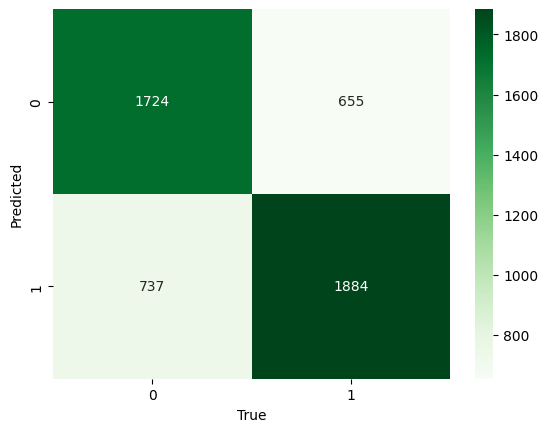

[[1724  655]
 [ 737 1884]]


In [103]:

# Confusion matrix and classification report
cf = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cf, annot=True, fmt= 'd', cmap="Greens")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

#print confusion matrix
print(cf)

In [22]:

print(classification_report(y_test, y_test_pred, digits=3))



              precision    recall  f1-score   support

           0      0.655     0.655     0.655      2379
           1      0.687     0.687     0.687      2621

    accuracy                          0.672      5000
   macro avg      0.671     0.671     0.671      5000
weighted avg      0.672     0.672     0.672      5000



<Axes: >

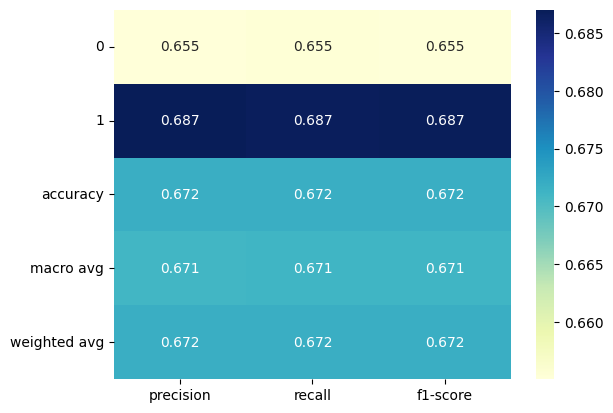

In [23]:
report = classification_report(y_test, y_test_pred, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, fmt=".3f", cmap="YlGnBu")

In [24]:
# !pip install scikit-plot
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

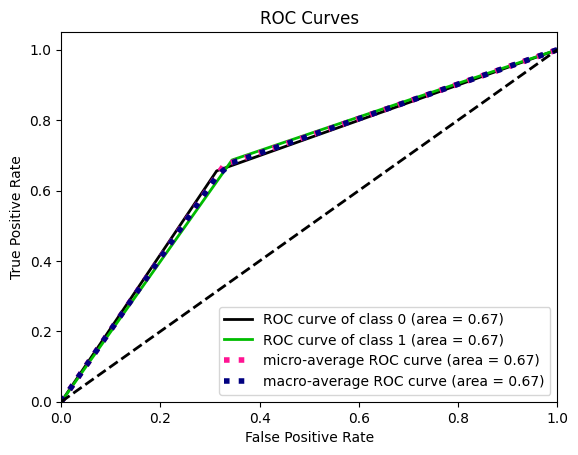

In [25]:
#plot roc showing auc score in 3 decimal places
plot_roc(y_test, dt.predict_proba(X_test))

Hyperparameter Tuning with Cross Validation 

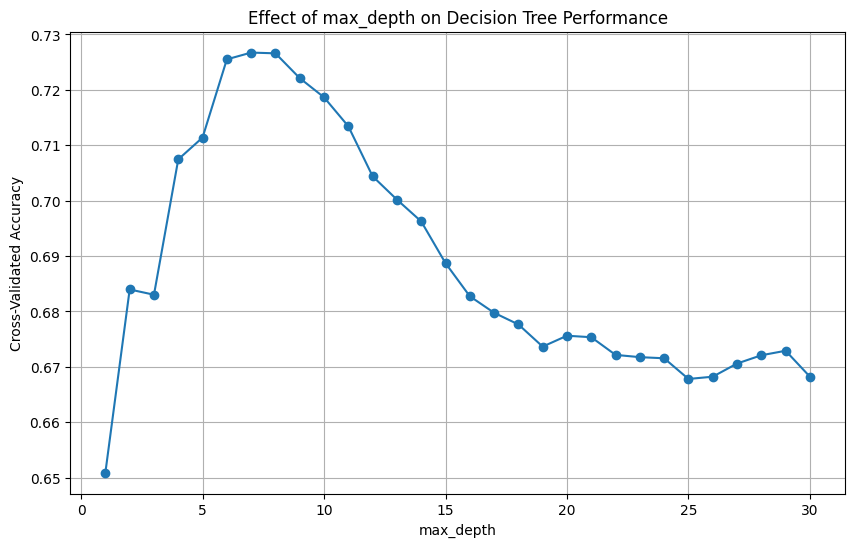

Best max_depth value: 7


In [26]:
#import cross_val_score
from sklearn.model_selection import cross_val_score
# Range of `max_depth` values to explore
max_depth_values = np.arange(1, 31)

# Store the average accuracy for each value of max_depth
avg_scores = []

# Loop over the values
for max_depth in max_depth_values:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    scores = cross_val_score(dt, X_train, y_train, cv=5, scoring='accuracy')
    avg_scores.append(np.mean(scores))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, avg_scores, marker='o')
plt.title('Effect of max_depth on Decision Tree Performance')
plt.xlabel('max_depth')
plt.ylabel('Cross-Validated Accuracy')
plt.grid(True)
plt.show()

# Identify the value of max_depth that corresponds to the highest mean accuracy
best_max_depth = max_depth_values[np.argmax(avg_scores)]
print(f'Best max_depth value: {best_max_depth}')

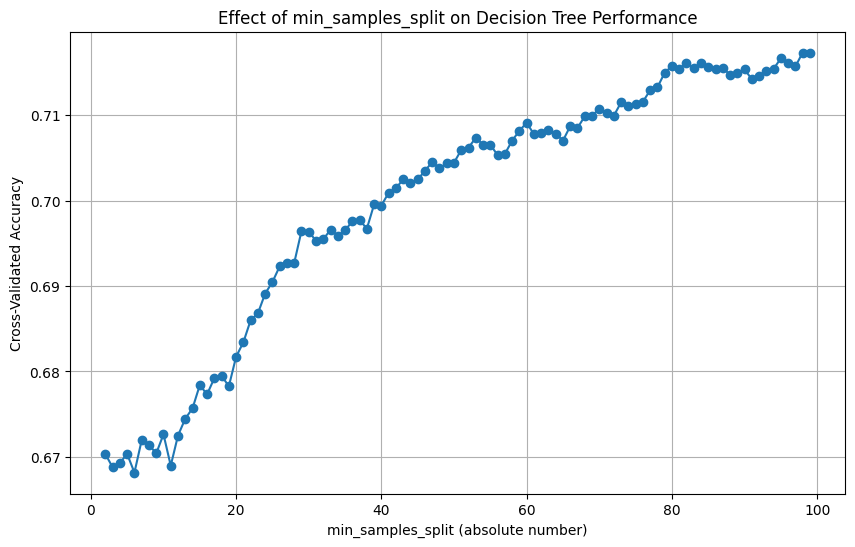

Best min_samples_split value: 98


In [27]:
min_samples_split_values = np.arange(2, 100)  # Starting from 2 up to 100

# Store the average accuracy for each value of min_samples_split
avg_scores = []

# Loop over the values
for min_samples_split in min_samples_split_values:
    dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
    scores = cross_val_score(dt, X_train, y_train, cv=5, scoring='accuracy')
    avg_scores.append(np.mean(scores))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(min_samples_split_values, avg_scores, marker='o')
plt.title('Effect of min_samples_split on Decision Tree Performance')
plt.xlabel('min_samples_split (absolute number)')
plt.ylabel('Cross-Validated Accuracy')
plt.grid(True)
plt.show()

# Identify the value of min_samples_split that corresponds to the highest mean accuracy
best_min_samples_split = min_samples_split_values[np.argmax(avg_scores)]
print(f'Best min_samples_split value: {best_min_samples_split}')

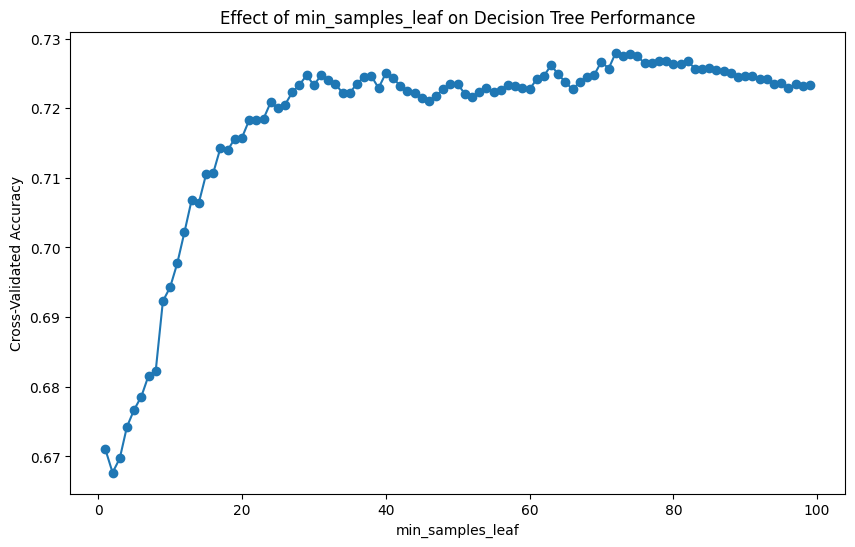

Best min_samples_leaf value: 72


In [28]:
# Range of `min_samples_leaf` values to explore.
min_samples_leaf_values = np.arange(1, 100)

# Store the average accuracy for each value of min_samples_leaf
avg_scores = []

# Loop over the values
for min_samples_leaf in min_samples_leaf_values:
    dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    scores = cross_val_score(dt, X_train, y_train, cv=5, scoring='accuracy')
    avg_scores.append(np.mean(scores))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(min_samples_leaf_values, avg_scores, marker='o')
plt.title('Effect of min_samples_leaf on Decision Tree Performance')
plt.xlabel('min_samples_leaf')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# Identify the value of min_samples_leaf that corresponds to the highest mean accuracy
best_min_samples_leaf = min_samples_leaf_values[np.argmax(avg_scores)]
print(f'Best min_samples_leaf value: {best_min_samples_leaf}')




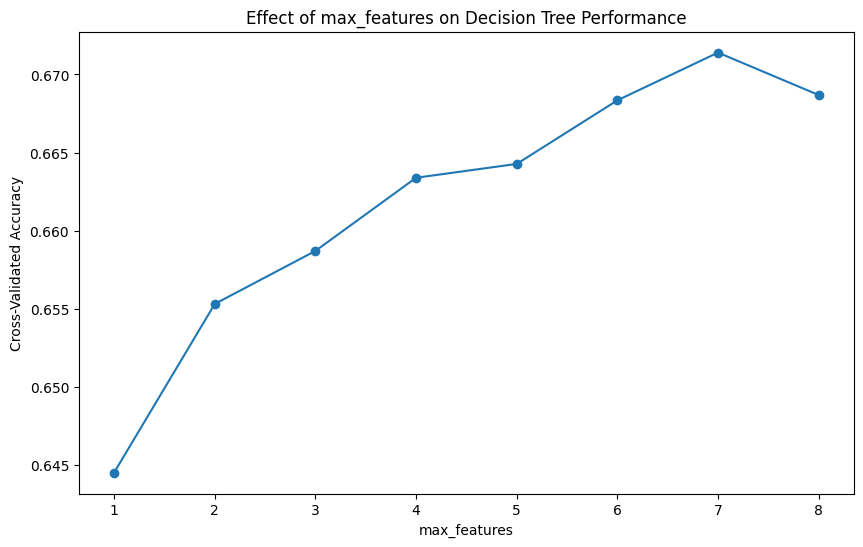

Best max_features value: 7


In [29]:
# Range of `max_features` values to explore.
max_features_values = np.arange(1, X_train.shape[1] + 1)

# Store the average accuracy for each value of max_features
avg_scores = []

# Loop over the values
for max_features in max_features_values:
    dt = DecisionTreeClassifier(max_features=max_features)
    scores = cross_val_score(dt, X_train, y_train, cv=5, scoring='accuracy')
    avg_scores.append(np.mean(scores))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(max_features_values, avg_scores, marker='o')
plt.title('Effect of max_features on Decision Tree Performance')
plt.xlabel('max_features')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# Identify the value of max_features that corresponds to the highest mean accuracy
best_max_features = max_features_values[np.argmax(avg_scores)]
print(f'Best max_features value: {best_max_features}')


In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Assuming X_train and y_train are already defined

# Initial model hyperparameters
initial_params = {
    'criterion': 'entropy',
    'max_features': 7,
    'max_depth': 8,
    'min_samples_split': 98,
    'min_samples_leaf': 72,
    'random_state': 42
}

# Define the parameter grid to search around the initial values
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_features': [6, 7, 8],
    'max_depth': [7, 8, 9, 10],
    'min_samples_split': [90, 95, 99, 100, 105],
    'min_samples_leaf': [70, 71, 72, 80, 85]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42), 
    param_grid, 
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # or other metrics
    verbose=1,  # for logging output
    n_jobs=-1  # use all CPU cores
)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# View the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Score:", grid_search.best_score_)


Fitting 5 folds for each of 600 candidates, totalling 3000 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 8, 'min_samples_leaf': 70, 'min_samples_split': 90}
Best Cross-Validated Score: 0.7346315665403125


In [31]:
best_model = grid_search.best_estimator_

In [32]:
#use the best model to fit the decision tree
best_model.fit(X_train, y_train)

#Print Confusion Matrix
y_pred = best_model.predict(X_test)
# Calculate accuracy
acc = accuracy_score(y_test, y_pred) * 100
print('Accuracy is: {0}'.format(acc))



Accuracy is: 73.22


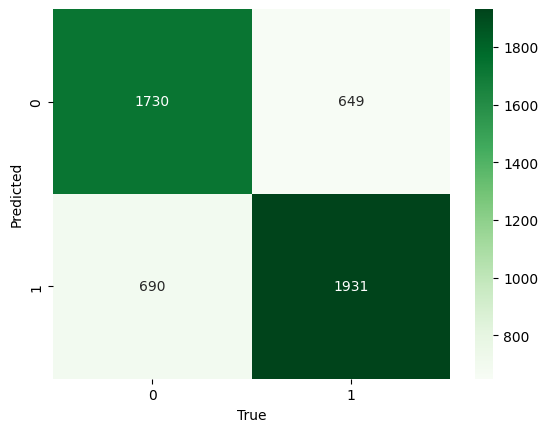

In [40]:
#plot the confusion matrix for the best model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt= 'd', cmap="Greens")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()


<Axes: >

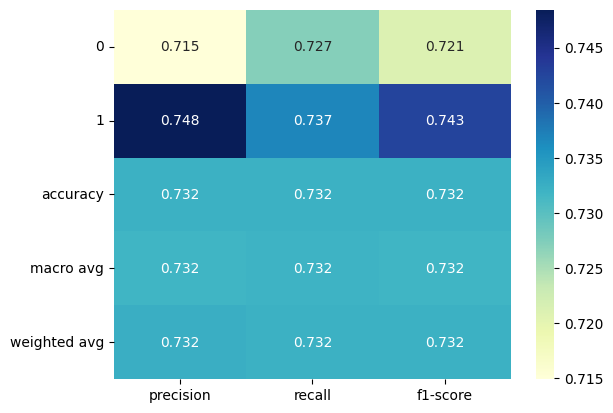

In [41]:
#plot the classification report for the best model
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, fmt=".3f", cmap="YlGnBu")


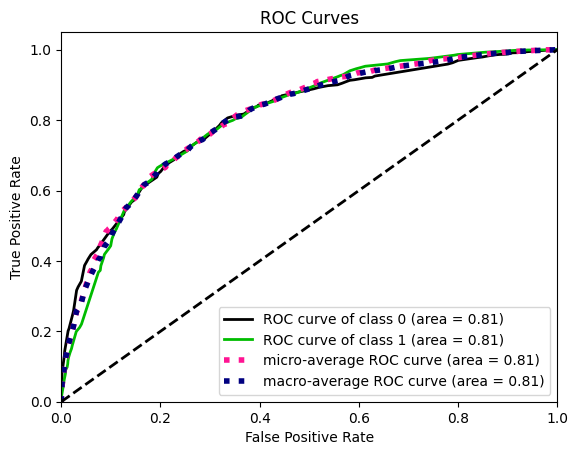

In [93]:
plot_roc(y_test, best_model.predict_proba(X_test))
plt.show()

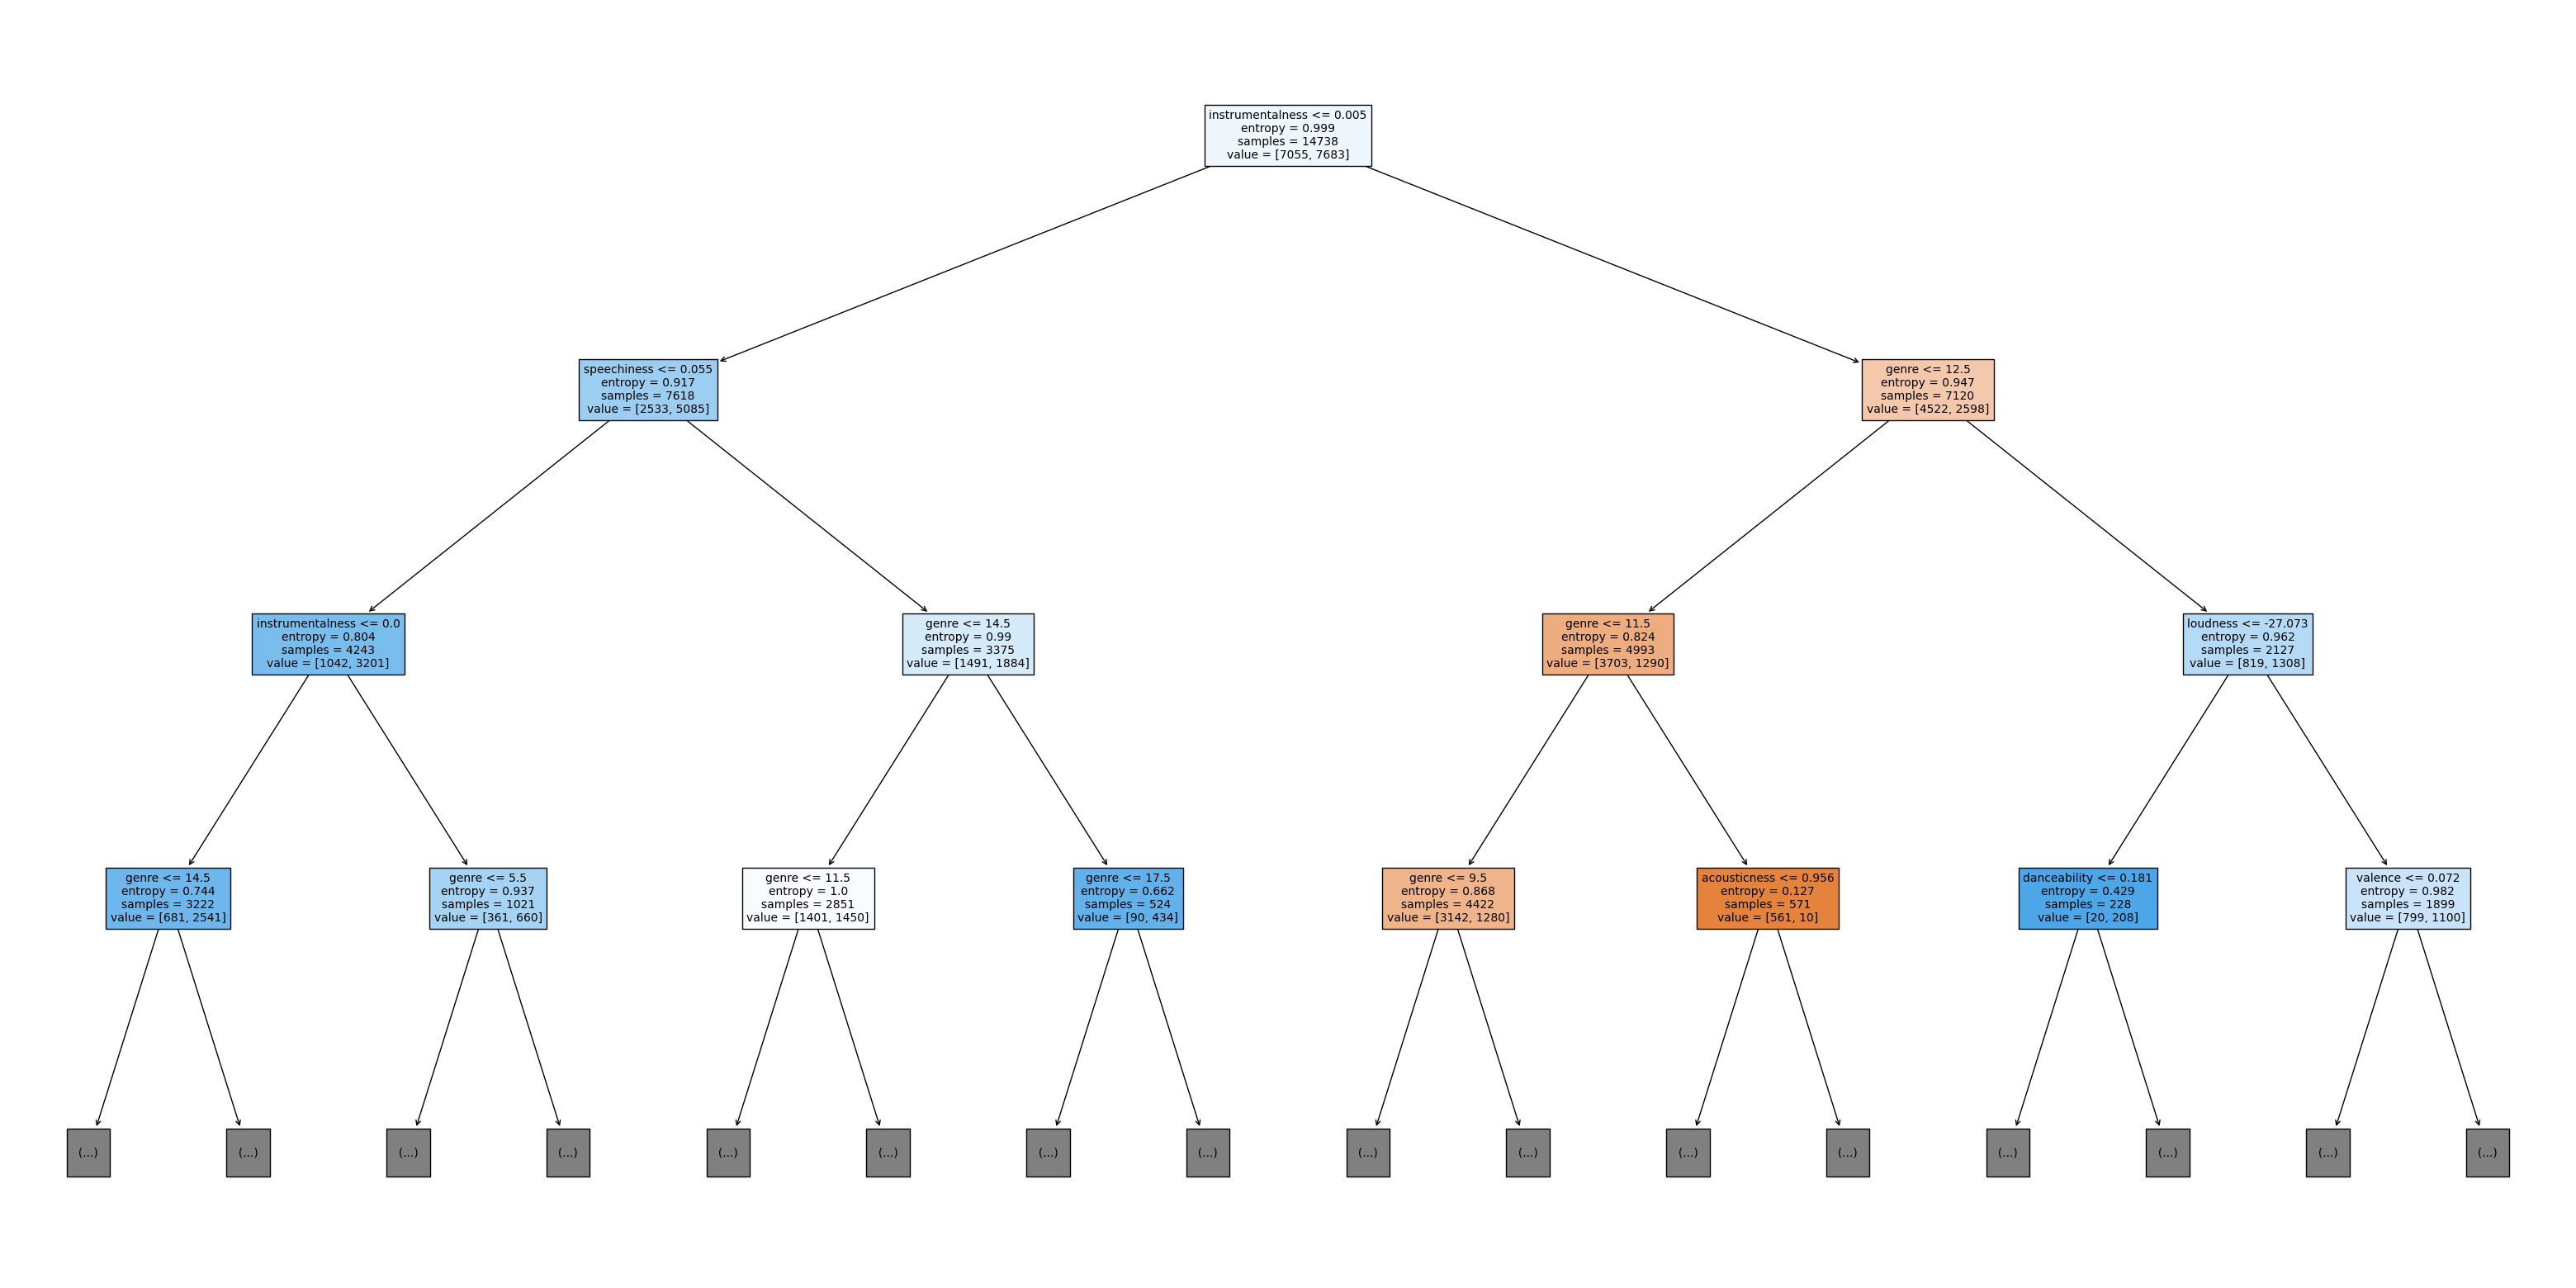

In [102]:
'''#plot the tree as visible as possible showing the feature names
from sklearn import tree
plt.figure(figsize=(20,15))
tree.plot_tree(best_model, filled=True, fontsize=10)
plt.show()
'''
'''from sklearn import tree
plt.figure(figsize=(20,15))
tree.plot_tree(best_model, filled=True, fontsize=10)
plt.show()
'''
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming 'clf' is your trained Decision Tree classifier
# and 'feature_names' is a list of your feature names

plt.figure(figsize=(40,20))  # Set the desired size of the plot
plot_tree(best_model, feature_names=attributes2, filled=True, max_depth=3, fontsize=10)
plt.show()


RANDOMIZED SEARCH

In [33]:
#import randomised search cv
from sklearn.model_selection import RandomizedSearchCV
#import repeated stratified k fold
from sklearn.model_selection import RepeatedStratifiedKFold

In [34]:
%%time
param_list = {
    'max_depth': [None] + list(np.arange(2, 20)),
    'min_samples_split': [2, 5, 10, 20, 30, 50, 100],
    'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100],
    'max_features': list(range(1, X_train.shape[1])),
    'criterion': ['gini', 'entropy']
}

clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1)

random_search = RandomizedSearchCV(
    DecisionTreeClassifier(),
    param_distributions=param_list,
    cv=RepeatedStratifiedKFold(random_state=42),
    n_jobs=-1,
    refit=True,
    n_iter=200,
    #verbose=2
)

random_search.fit(X_train, y_train)
clf = random_search.best_estimator_



CPU times: user 10.8 s, sys: 2.1 s, total: 12.9 s
Wall time: 1min 3s


In [35]:
print(random_search.best_params_, random_search.best_score_)

{'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 7, 'max_depth': 8, 'criterion': 'entropy'} 0.7306352986893276


In [36]:
y_test_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_test_pred))

Accuracy: 0.729


In [37]:
clf.score(X_test, y_test)

0.729

In [38]:
print('Train Accuracy %s' % accuracy_score(y_train, y_train_pred))
print('Train F1-score %s' % f1_score(y_train, y_train_pred, average=None))
print()

print('Test Accuracy %s' % accuracy_score(y_test, y_test_pred))
print('Test F1-score %s' % f1_score(y_test, y_test_pred, average=None))

Train Accuracy 0.9987786673904193
Train F1-score [0.99872539 0.99882767]

Test Accuracy 0.729
Test F1-score [0.70891515 0.74649205]


In [39]:
print(classification_report(y_test, y_test_pred, digits=3))

              precision    recall  f1-score   support

           0      0.725     0.694     0.709      2379
           1      0.732     0.761     0.746      2621

    accuracy                          0.729      5000
   macro avg      0.729     0.727     0.728      5000
weighted avg      0.729     0.729     0.729      5000



CCP_ALPHAS

In [42]:
random_search.best_params_

{'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 7,
 'max_depth': 8,
 'criterion': 'entropy'}

In [43]:
# Extract the effective alphas and corresponding impurities
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities


In [45]:
# Evaluate the performance for each ccp_alpha
scores = []
for ccp_alpha in ccp_alphas:
    cdt = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    score = np.mean(cross_val_score(dt, X_train, y_train, cv=5))
    scores.append(score)

In [46]:
# Find the best ccp_alpha
best_ccp_alpha = ccp_alphas[np.argmax(scores)]

In [47]:
# Final model with best ccp_alpha
final_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=best_ccp_alpha)
final_dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0003591366333194888, random_state=42)

In [48]:
y_test_pred = final_dt.predict(X_test)

In [49]:
print('Train Accuracy %s' % accuracy_score(y_train, y_train_pred))
print('Train F1-score %s' % f1_score(y_train, y_train_pred, average=None))
print()

print('Test Accuracy %s' % accuracy_score(y_test, y_test_pred))
print('Test F1-score %s' % f1_score(y_test, y_test_pred, average=None))

Train Accuracy 0.9987786673904193
Train F1-score [0.99872539 0.99882767]

Test Accuracy 0.7216
Test F1-score [0.71239669 0.73023256]


In [50]:
y_test_pred = final_dt.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_test_pred))

Accuracy: 0.7216


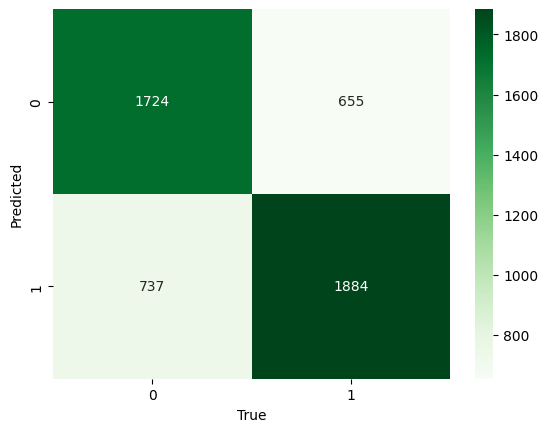

In [91]:
#plot the confusion matrix for the best model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt= 'd', cmap="Greens")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()


In [51]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71      2379
           1       0.74      0.72      0.73      2621

    accuracy                           0.72      5000
   macro avg       0.72      0.72      0.72      5000
weighted avg       0.72      0.72      0.72      5000



<Axes: >

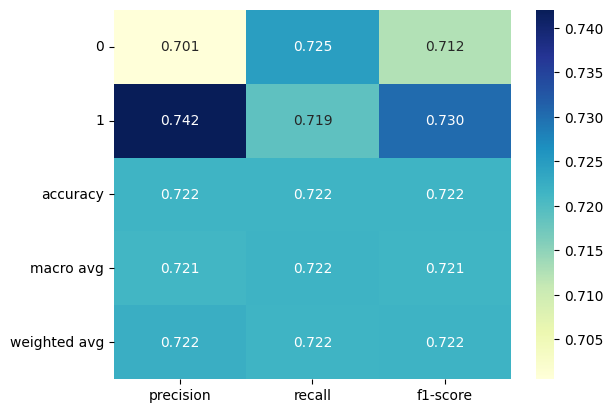

In [92]:
#plot the classification report for the best model
from sklearn.metrics import classification_report
report = classification_report(y_test, y_test_pred, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, fmt=".3f", cmap="YlGnBu")


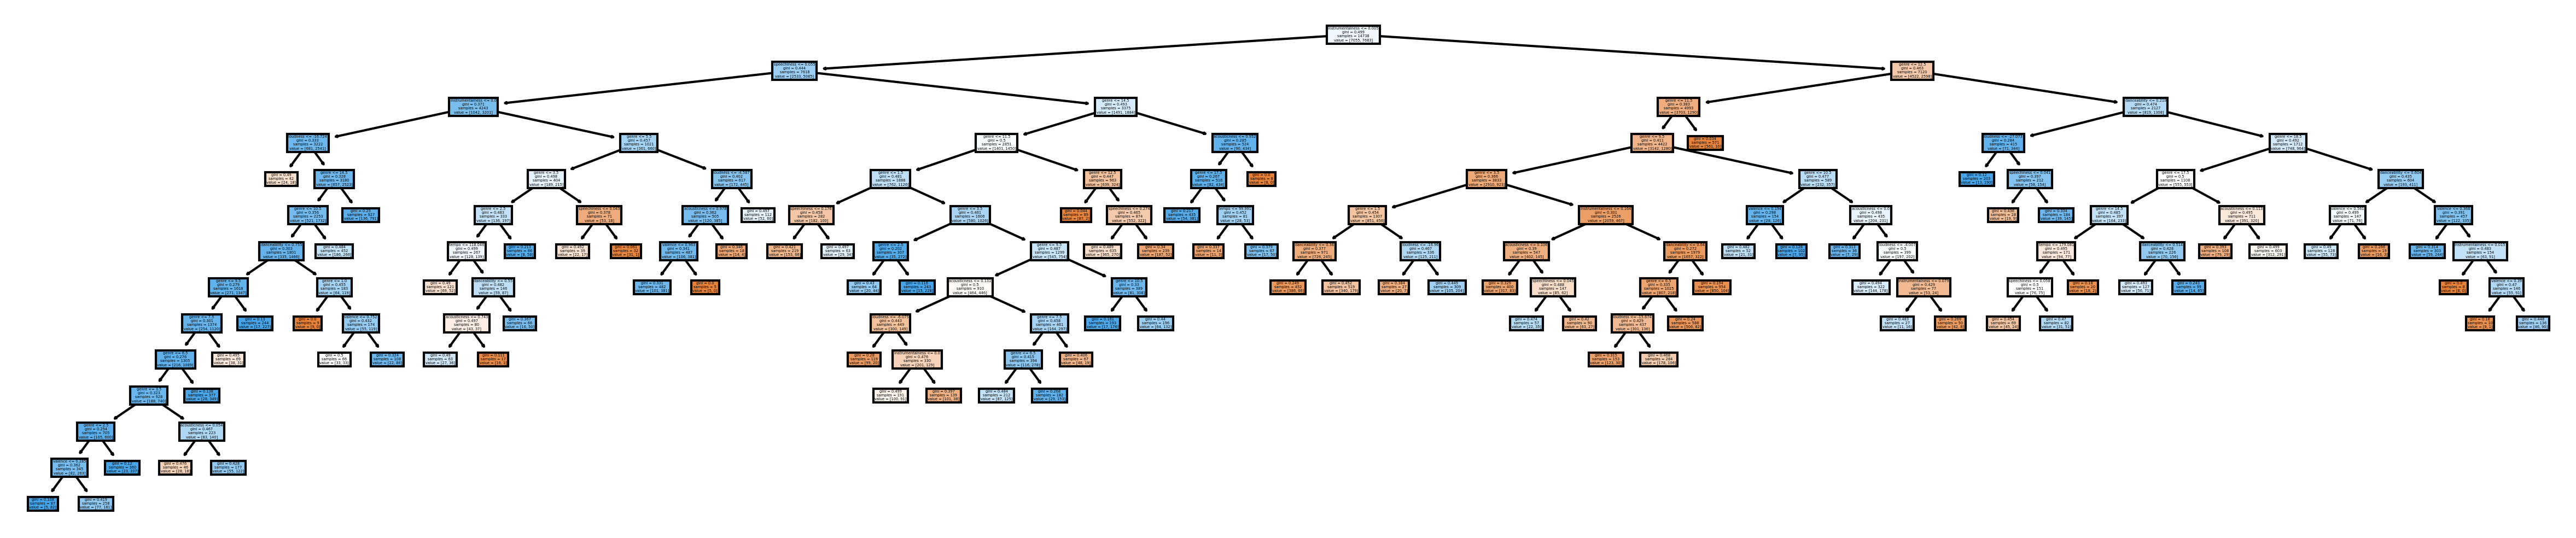

In [54]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4), dpi=300)
plot_tree(final_dt, feature_names=attributes, filled=True)
plt.show()

In [55]:
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall

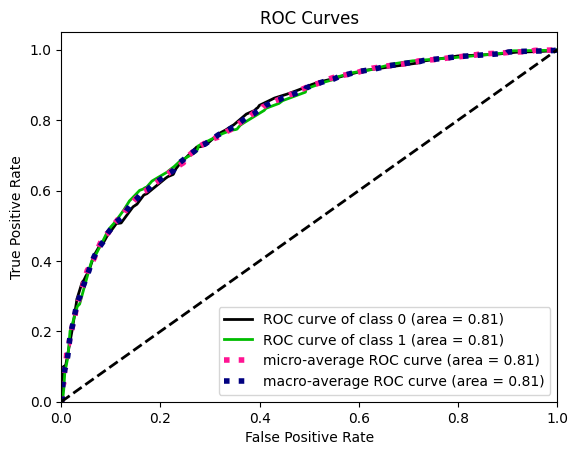

In [56]:
plot_roc(y_test, final_dt.predict_proba(X_test))
plt.show()

KNN

In [57]:
# Instantiate RObust Scaler
scaler = RobustScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)




In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
# Instantiate KNeighborsClassifier
clf = KNeighborsClassifier()

# Fit the classifier
clf.fit(scaled_data_train, y_train)

# Predict on the test set
test_preds = clf.predict(scaled_data_test)

In [60]:
print(confusion_matrix(y_test, test_preds))

[[1549  830]
 [ 757 1864]]


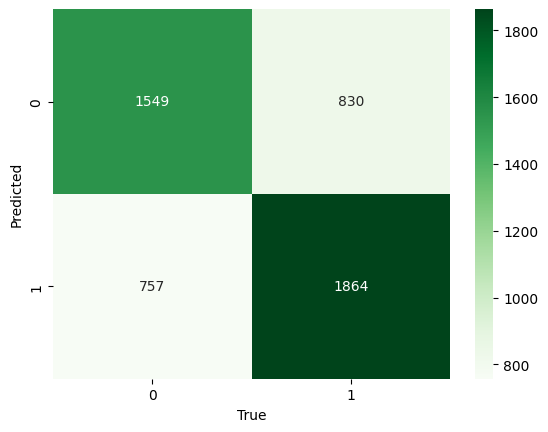

In [61]:
#plot confustion matrix heatmap 
cf = confusion_matrix(y_test, test_preds)
sns.heatmap(cf, annot=True, cmap="Greens", fmt ='d')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()



In [62]:

print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.67      0.65      0.66      2379
           1       0.69      0.71      0.70      2621

    accuracy                           0.68      5000
   macro avg       0.68      0.68      0.68      5000
weighted avg       0.68      0.68      0.68      5000



<Axes: >

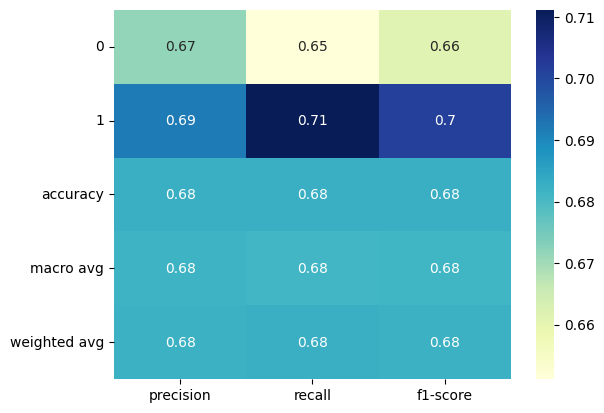

In [63]:
#plot the classification report
report = classification_report(y_test, test_preds, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap="YlGnBu")



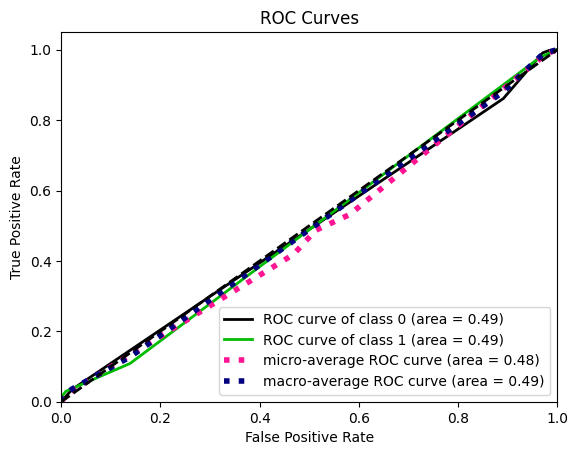

In [64]:
plot_roc(y_test, clf.predict_proba(X_test))
plt.show()

TUNING THE KNN WITH CV 

In [65]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=21):
    best_k = 0
    best_score = 0.0
    for k in range (min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score (y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    print ("Best value for k: {}".format(best_k))
    print ("F1-Score: {}".format(best_score))


In [66]:
find_best_k(scaled_data_train, y_train, scaled_data_test, y_test)


Best value for k: 19
F1-Score: 0.7196885428253615


In [67]:
# Instantiate KNeighborsClassifier
clf2 = KNeighborsClassifier(n_neighbors=21)

# Fit the classifier
clf2.fit(scaled_data_train, y_train)

# Predict on the test set
test_preds = clf2.predict(scaled_data_test)

In [68]:
print(confusion_matrix(y_test, test_preds))
print(classification_report(y_test, test_preds))


[[1535  844]
 [ 676 1945]]
              precision    recall  f1-score   support

           0       0.69      0.65      0.67      2379
           1       0.70      0.74      0.72      2621

    accuracy                           0.70      5000
   macro avg       0.70      0.69      0.69      5000
weighted avg       0.70      0.70      0.70      5000



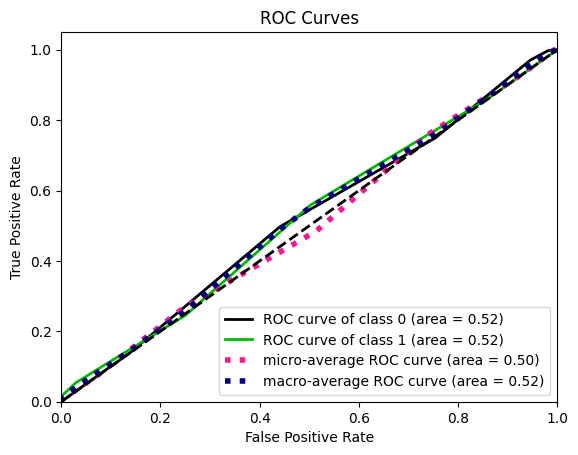

In [69]:
plot_roc(y_test, clf2.predict_proba(X_test))
plt.show()

GRID SEARCH


In [70]:
#import grid search
from sklearn.model_selection import GridSearchCV

In [71]:
# Define the parameter grid to search through
param_grid = {
  'n_neighbors': list(range(1, 21)),

    'weights': ['uniform', 'distance'],  # Weighting options
    'metric': ['euclidean', 'manhattan','jacquard']  # Distance metrics
}

In [72]:
# Initialize KNN classifier
knn = KNeighborsClassifier()

In [73]:
# Perform grid search with cross-validation (5-fold CV in this example) due to the large size of the dataset
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

/Users/charlesbruce/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
200 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/charlesbruce/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/charlesbruce/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Users/charlesbruce/miniconda3/envs/jupyter_env/lib/python3.10/site-packa

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'jacquard'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [74]:
# Display the best parameters found by grid search
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'}


In [76]:
#what next
# Instantiate KNeighborsClassifier
clf3 = KNeighborsClassifier(n_neighbors=13, metric='manhattan', weights='distance')

# Fit the classifier
clf3.fit(scaled_data_train, y_train)

# Predict on the test set
test_preds = clf3.predict(scaled_data_test)


In [77]:
#print training and test accuracy
print('Train Accuracy %s' % accuracy_score(y_train, clf3.predict(scaled_data_train)))
print('Test Accuracy %s' % accuracy_score(y_test, test_preds))


Train Accuracy 0.9987786673904193
Test Accuracy 0.7132


In [78]:
#print confusion matrix
print(confusion_matrix(y_test, test_preds))

[[1597  782]
 [ 652 1969]]


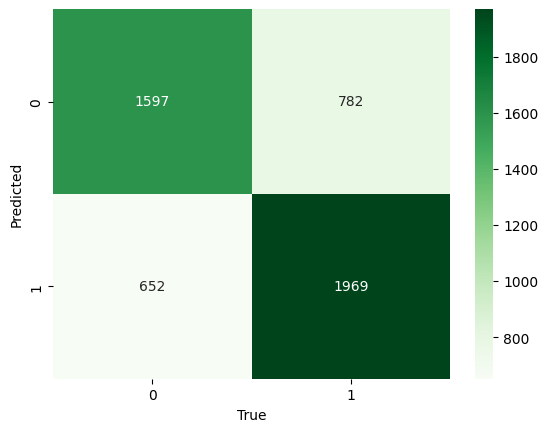

In [79]:
#Plot the confusion matrix
cf = confusion_matrix(y_test, test_preds)
sns.heatmap(cf, annot=True, cmap="Greens", fmt='d')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

In [80]:
#print classification report
print(classification_report(y_test, test_preds, digits=3))

              precision    recall  f1-score   support

           0      0.710     0.671     0.690      2379
           1      0.716     0.751     0.733      2621

    accuracy                          0.713      5000
   macro avg      0.713     0.711     0.712      5000
weighted avg      0.713     0.713     0.713      5000



<Axes: >

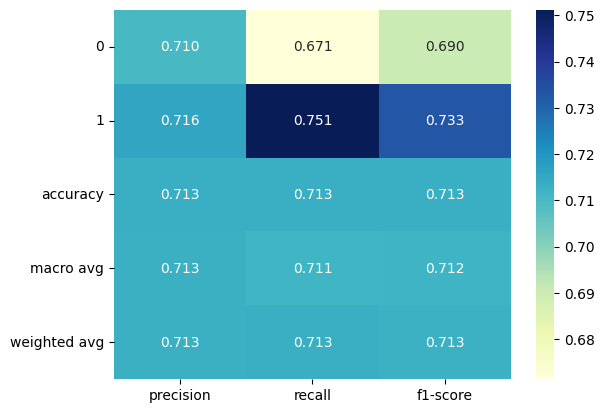

In [81]:
#plot classification report
report = classification_report(y_test, test_preds, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap="YlGnBu", fmt=".3f") 


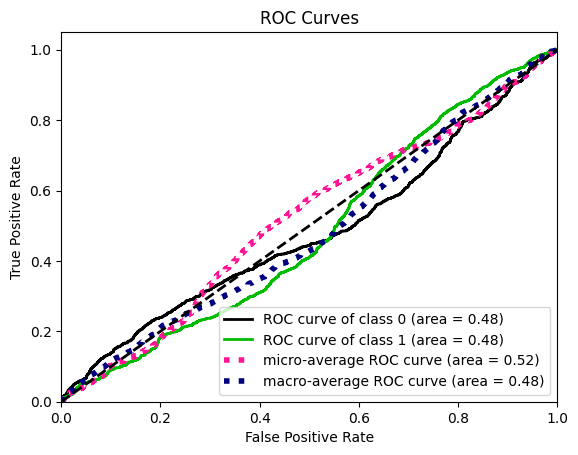

In [82]:
#plot the ROC CURVE
plot_roc(y_test, clf3.predict_proba(X_test))
plt.show()



NAIVE BAYES

In [83]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB

In [84]:
clf = GaussianNB()

In [85]:
%%time
clf.fit(X_train, y_train)

CPU times: user 6.63 ms, sys: 1.55 ms, total: 8.18 ms
Wall time: 6.47 ms


GaussianNB()

In [86]:
y_pred = clf.predict(X_test)
y_pred

array([1, 0, 1, ..., 1, 0, 0])

In [87]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1298 1081]
 [ 686 1935]]
              precision    recall  f1-score   support

           0       0.65      0.55      0.60      2379
           1       0.64      0.74      0.69      2621

    accuracy                           0.65      5000
   macro avg       0.65      0.64      0.64      5000
weighted avg       0.65      0.65      0.64      5000



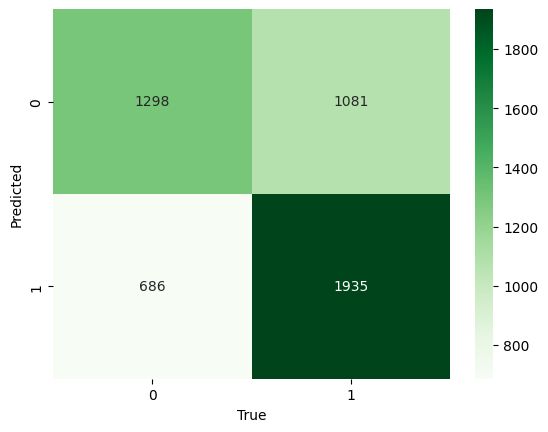

In [89]:
#plot the confusion matrix
cf = confusion_matrix(y_test, y_pred)
sns.heatmap(cf, annot=True, cmap="Greens", fmt='d')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()


<Axes: >

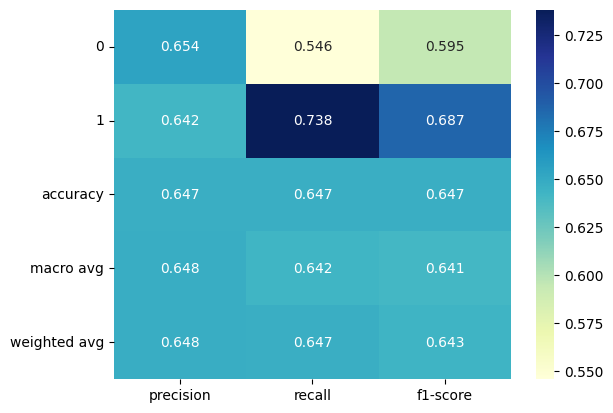

In [90]:
#plot the classification report
report = classification_report(y_test, y_pred, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap="YlGnBu", fmt=".3f")


In [88]:
clf.predict_proba(X_test)

array([[0.35462898, 0.64537102],
       [0.77560854, 0.22439146],
       [0.32679924, 0.67320076],
       ...,
       [0.29118976, 0.70881024],
       [0.64483992, 0.35516008],
       [0.59182132, 0.40817868]])

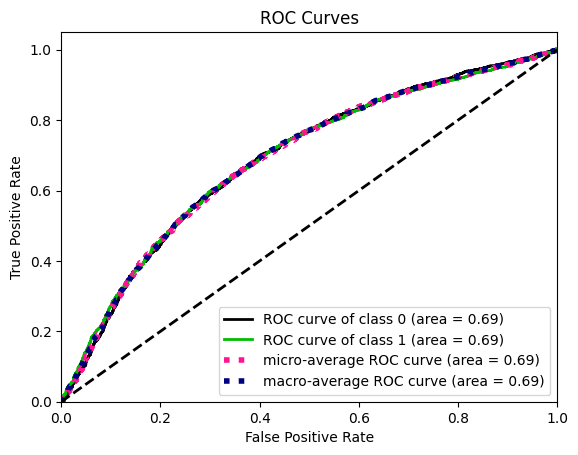

In [94]:
#plot the ROC CURVE
plot_roc(y_test, clf.predict_proba(X_test))
plt.show()

